In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
L = 0.02
m = 5
n = 6
point_num = m * n

x = np.linspace(0, L, n)
y = np.linspace(0, L, m)

grid = np.meshgrid(x, y)

In [58]:
points = np.zeros((point_num, 2))
for i in range(point_num):
    points[i, 0], points[i, 1] = grid[0].flatten()[i], grid[1].flatten()[i]

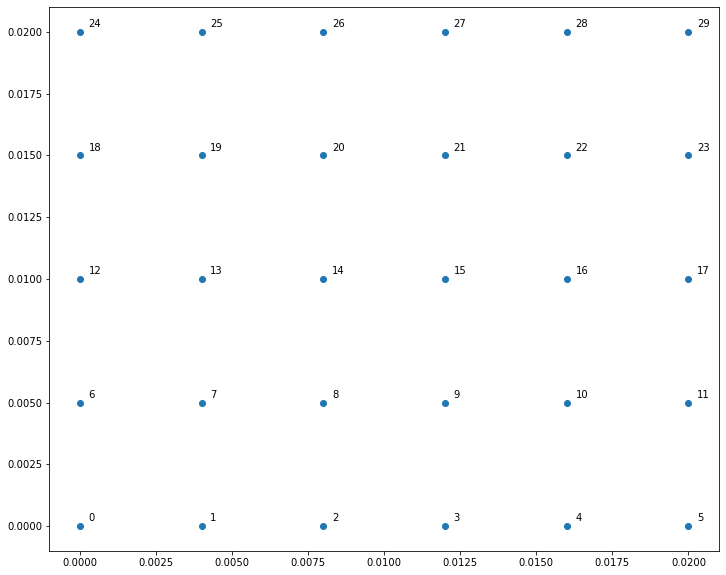

In [59]:
plt.figure(figsize=(12, 10))
plt.scatter(points.transpose()[0], points.transpose()[1])
for i in range(point_num):
    plt.annotate(i, (points.transpose()[0][i]+L/70, points.transpose()[1][i]+L/100))
plt.show()

In [60]:
cells = np.zeros(((n-1)*(m-1)*2, 3), dtype=np.int8)
j = 0
for i in range((n-1)*(m-1)*2):
    if i % 2 == 0:
        cells[i][0], cells[i][1], cells[i][2] = j, j + 1, j + n
        j += n + 1
    else:
        cells[i][0], cells[i][1], cells[i][2] = j, j - 1, j - n
        if (i + 1) % (2 * (n - 1)) == 0:
            j = j - n + 1
        else:
            j -= n

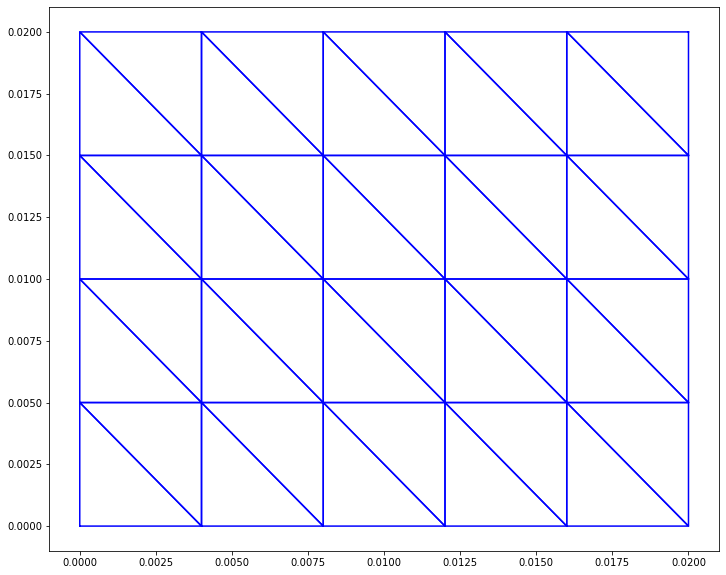

In [61]:
x_c = points.transpose()[0]
y_c = points.transpose()[1]
plt.figure(figsize=(12, 10))
for i in cells:
    plt.plot([x_c[i[0]], x_c[i[1]], x_c[i[2]], x_c[i[0]]], [y_c[i[0]], y_c[i[1]], y_c[i[2]], y_c[i[0]]], color='b')

In [62]:
points

array([[0.   , 0.   ],
       [0.004, 0.   ],
       [0.008, 0.   ],
       [0.012, 0.   ],
       [0.016, 0.   ],
       [0.02 , 0.   ],
       [0.   , 0.005],
       [0.004, 0.005],
       [0.008, 0.005],
       [0.012, 0.005],
       [0.016, 0.005],
       [0.02 , 0.005],
       [0.   , 0.01 ],
       [0.004, 0.01 ],
       [0.008, 0.01 ],
       [0.012, 0.01 ],
       [0.016, 0.01 ],
       [0.02 , 0.01 ],
       [0.   , 0.015],
       [0.004, 0.015],
       [0.008, 0.015],
       [0.012, 0.015],
       [0.016, 0.015],
       [0.02 , 0.015],
       [0.   , 0.02 ],
       [0.004, 0.02 ],
       [0.008, 0.02 ],
       [0.012, 0.02 ],
       [0.016, 0.02 ],
       [0.02 , 0.02 ]])

In [63]:
cells

array([[ 0,  1,  6],
       [ 7,  6,  1],
       [ 1,  2,  7],
       [ 8,  7,  2],
       [ 2,  3,  8],
       [ 9,  8,  3],
       [ 3,  4,  9],
       [10,  9,  4],
       [ 4,  5, 10],
       [11, 10,  5],
       [ 6,  7, 12],
       [13, 12,  7],
       [ 7,  8, 13],
       [14, 13,  8],
       [ 8,  9, 14],
       [15, 14,  9],
       [ 9, 10, 15],
       [16, 15, 10],
       [10, 11, 16],
       [17, 16, 11],
       [12, 13, 18],
       [19, 18, 13],
       [13, 14, 19],
       [20, 19, 14],
       [14, 15, 20],
       [21, 20, 15],
       [15, 16, 21],
       [22, 21, 16],
       [16, 17, 22],
       [23, 22, 17],
       [18, 19, 24],
       [25, 24, 19],
       [19, 20, 25],
       [26, 25, 20],
       [20, 21, 26],
       [27, 26, 21],
       [21, 22, 27],
       [28, 27, 22],
       [22, 23, 28],
       [29, 28, 23]], dtype=int8)

In [ ]:
A = [[a1 - a0, a2 - a0],
     [a1 - a0, a2 - a0]]
b = [a0,
    a0]

F(x, y) = A * [x, y] + b